# Crop yield and fertilizers

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from GeoConformalizedExplainer import GeoConformalizedExplainer

/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_1999 = pd.read_csv('../data/yield_fertilizer_1999.csv')

In [3]:
data_1999

,fid,primaryindex,TOP2,TOP3,TOP4,NXTOP2,NXTOP3,NXTOP4,N2XTOP2,N2XTOP3,...,BV2XT4,SAT,SAT2,NXSAT,SATXT2,SATXT3,SATXT4,SAT2XT2,SAT2XT3,SAT2XT4
0,1,1,0,0,1,0,0,132,0,0,...,26438.760,2.21,4.88,290.62,0.00,0.00,2.21,0.00,0.00,4.88
1,2,2,0,0,1,0,0,132,0,0,...,29066.840,2.21,4.88,290.62,0.00,0.00,2.21,0.00,0.00,4.88
2,3,3,0,0,1,0,0,132,0,0,...,28355.192,2.24,5.02,294.56,0.00,0.00,2.24,0.00,0.00,5.02
3,4,4,0,0,1,0,0,132,0,0,...,31215.822,2.24,5.02,294.56,0.00,0.00,2.24,0.00,0.00,5.02
4,5,5,0,0,1,0,0,132,0,0,...,29398.532,2.24,5.02,294.56,0.00,0.00,2.24,0.00,0.00,5.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1734,1734,-1,-1,-1,-29,-29,-29,-841,-841,...,-26948.506,2.12,4.49,61.48,-2.12,-2.12,-2.12,-4.49,-4.49,-4.49
1734,1735,1735,-1,-1,-1,-29,-29,-29,-841,-841,...,-27053.670,2.12,4.49,61.48,-2.12,-2.12,-2.12,-4.49,-4.49,-4.49
1735,1736,1736,-1,-1,-1,-29,-29,-29,-841,-841,...,-28016.064,2.12,4.49,61.48,-2.12,-2.12,-2.12,-4.49,-4.49,-4.49
1736,1737,1737,-1,-1,-1,-29,-29,-29,-841,-841,...,-27752.228,2.12,4.49,61.48,-2.12,-2.12,-2.12,-4.49,-4.49,-4.49


In [4]:
crop_yield_1999 = data_1999['YIELD']

In [5]:
loc_1999 = data_1999[['LONGITUDE', 'LATITUDE']]

In [6]:
features_1999 = data_1999[['N', 'BV', 'SAT', 'NXTOP2', 'NXTOP3', 'NXTOP4', 'NXBV', 'BVXT2', 'BVXT3', 'BVXT4', 'NXSAT', 'SATXT2', 'SATXT3', 'SATXT4', 'LATITUDE', 'LONGITUDE']]

In [7]:
data_2001 = pd.read_csv('../data/yield_fertilizer_2001.csv')

In [8]:
data_2001

,fid,primaryindex,ID,TOP3,TOP2,TOP4,NXTOP2,NXTOP3,NXTOP4,N2XTOP2,...,N2,BV,BV2,NXBV,BVXT2,BVXT3,BVXT4,BV2XT2,BV2XT3,BV2XT4
0,1,1,2422,0,0,1,0.0,0.0,124.6,0.0,...,15525.16,174.53,30460.721,21746.438,0.00,0.00,174.53,0.00,0.0,30460.72
1,2,2,2423,0,0,1,0.0,0.0,124.6,0.0,...,15525.16,173.25,30015.563,21586.950,0.00,0.00,173.25,0.00,0.0,30015.56
2,3,3,2424,0,0,1,0.0,0.0,124.6,0.0,...,15525.16,175.09,30656.508,21816.214,0.00,0.00,175.09,0.00,0.0,30656.51
3,4,4,2425,0,0,1,0.0,0.0,124.6,0.0,...,15525.16,174.08,30303.846,21690.368,0.00,0.00,174.08,0.00,0.0,30303.85
4,5,5,2426,0,0,1,0.0,0.0,124.6,0.0,...,15525.16,170.89,29203.392,21292.894,0.00,0.00,170.89,0.00,0.0,29203.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,1701,1701,4293,-1,-1,-1,-39.0,-39.0,-39.0,-1521.0,...,1521.00,168.66,28446.196,6577.740,-168.66,-168.66,-168.66,-28446.20,-28446.2,-28446.20
1701,1702,1702,4294,-1,-1,-1,-39.0,-39.0,-39.0,-1521.0,...,1521.00,165.65,27439.923,6460.350,-165.65,-165.65,-165.65,-27439.92,-27439.9,-27439.90
1702,1703,1703,4295,-1,-1,-1,-39.0,-39.0,-39.0,-1521.0,...,1521.00,166.75,27805.563,6503.250,-166.75,-166.75,-166.75,-27805.56,-27805.5,-27805.50
1703,1704,1704,4296,-1,-1,-1,-39.0,-39.0,-39.0,-1521.0,...,1521.00,163.59,26761.688,6380.010,-163.59,-163.59,-163.59,-26761.69,-26761.6,-26761.60


In [9]:
crop_yield_2001 = data_2001['YIELD']


In [10]:
features_2001 = data_2001[['N', 'BV', 'NXTOP2', 'NXTOP3', 'NXTOP4', 'NXBV', 'BVXT2', 'BVXT3', 'BVXT4', 'LATITUDE', 'LONGITUDE']]

In [11]:
loc_2001 = data_2001[['LONGITUDE', 'LATITUDE']]

## Crop Yield 1999

In [12]:
X_train_99, X_temp, y_train_99, y_temp, loc_train_99, loc_temp = train_test_split(features_1999, crop_yield_1999, loc_1999, train_size=0.8, random_state=42)

In [13]:
X_calib_99, X_test_99, y_calib_99, y_test_99, loc_calib_99, loc_test_99 = train_test_split(X_temp, y_temp, loc_temp, train_size=0.5, random_state=42)

In [14]:
model = xgb.XGBRegressor(n_estimators=500, max_depth=3, min_child_weight=1.0, colsample_bytree=1.0)

In [15]:
model.fit(X_train_99, y_train_99)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
model.score(X_test_99, y_test_99)

0.8234132236657132

In [17]:
explainer = GeoConformalizedExplainer(model, X_train_99, X_calib_99, loc_calib_99.values, loc_test_99.values, 0.1, 0.01)

In [18]:
results = explainer.uncertainty_aware_explain(x_test=X_test_99)

  0%|          | 0/16 [00:00<?, ?it/s]/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:31:59] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)
 50%|█████     | 8/16 [00:56<00:56,  7.11s/it]/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:32:02] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:32:03] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "params" } are no

In [19]:
results.accuracy_summary()

,coverage_probability,R2,RMSE,SHAP_Var,Pred_SHAP_Var
N,0.890805,0.891263,0.100819,0.093478,0.078457
BV,0.942529,0.803108,0.376000,0.718036,0.493977
SAT,0.913793,0.907613,0.163595,0.289686,0.237512
NXTOP2,0.896552,0.960486,0.148392,0.557282,0.649325
NXTOP3,0.902299,0.885130,0.053735,0.025136,0.022090
NXTOP4,0.885057,0.974368,0.056243,0.123412,0.121498
NXBV,0.948276,0.979966,0.230227,2.645712,2.584008
BVXT2,0.867816,0.878411,0.151888,0.189736,0.146535
BVXT3,0.896552,0.877840,0.177104,0.256759,0.219644
BVXT4,0.913793,0.897518,0.163982,0.262388,0.212863


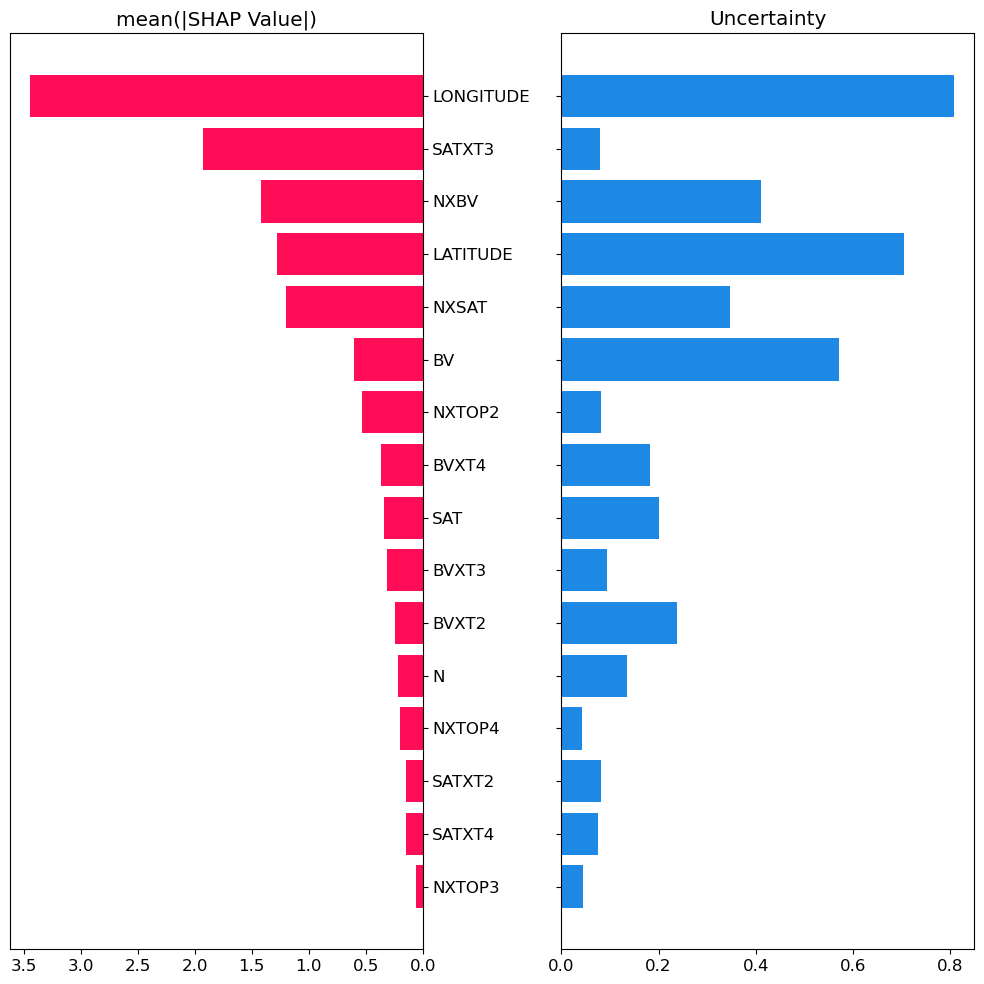

In [20]:
results.plot_absolute_shap_value_with_uncertainty()

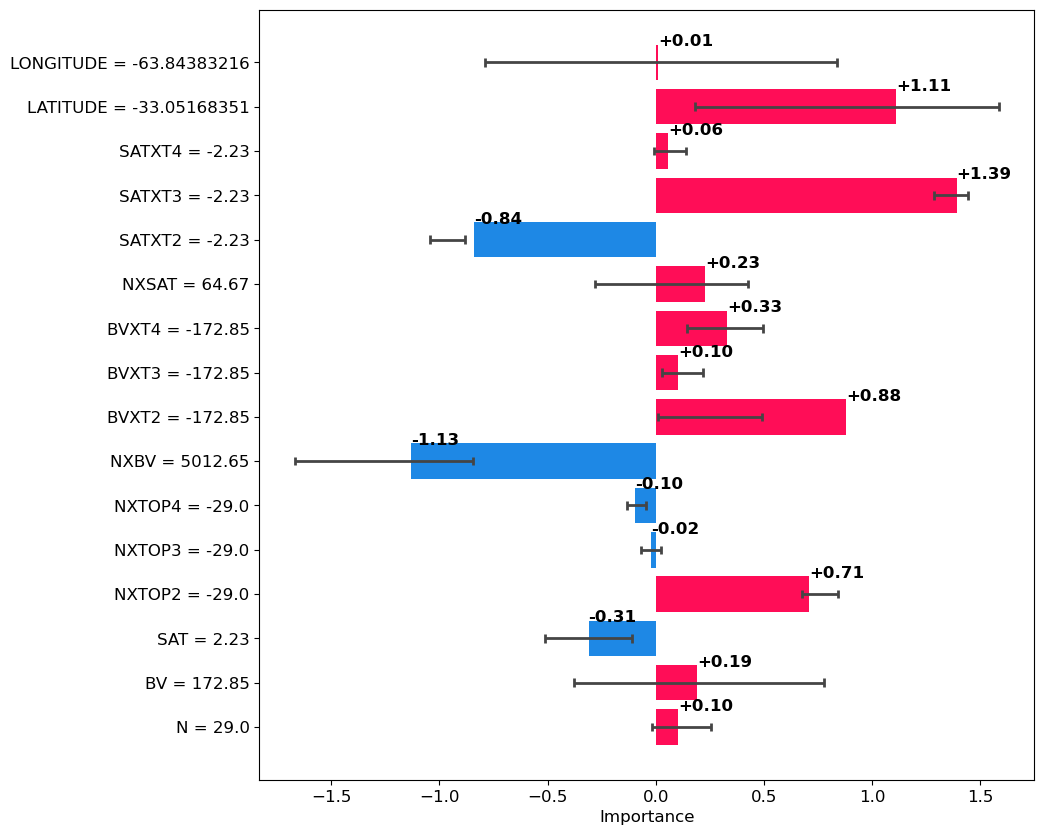

In [21]:
results.plot_shap_values_with_uncertainty(10)

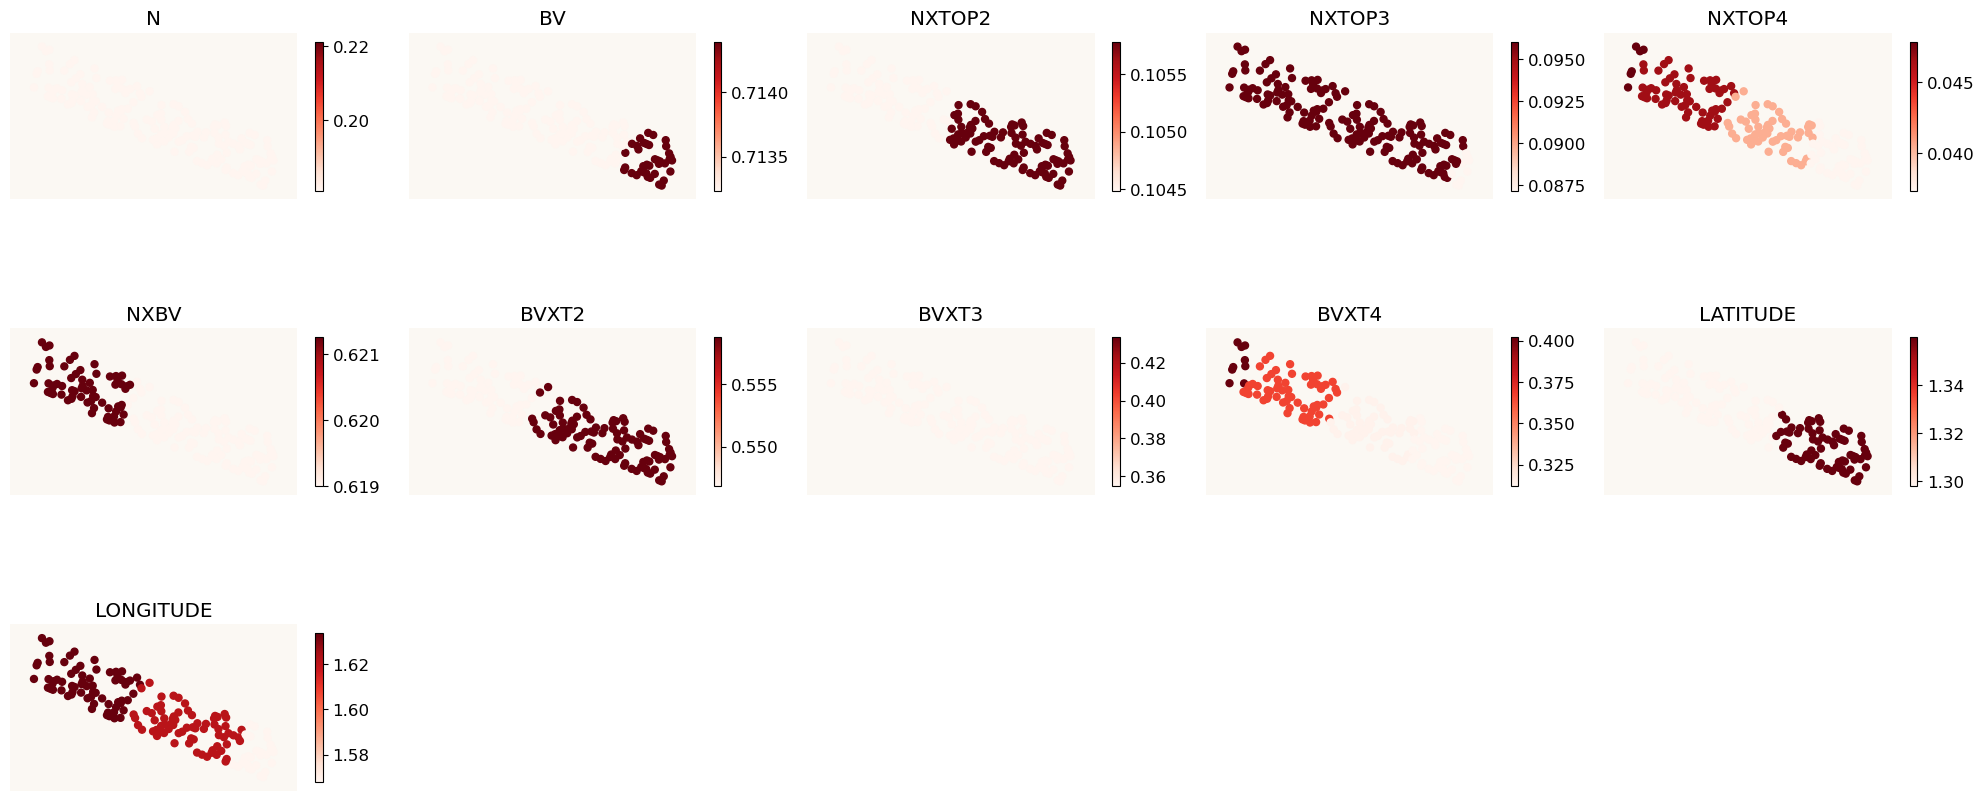

In [37]:
results.plot_geo_uncertainty(figsize=(20, 10), shrink=0.4)

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000

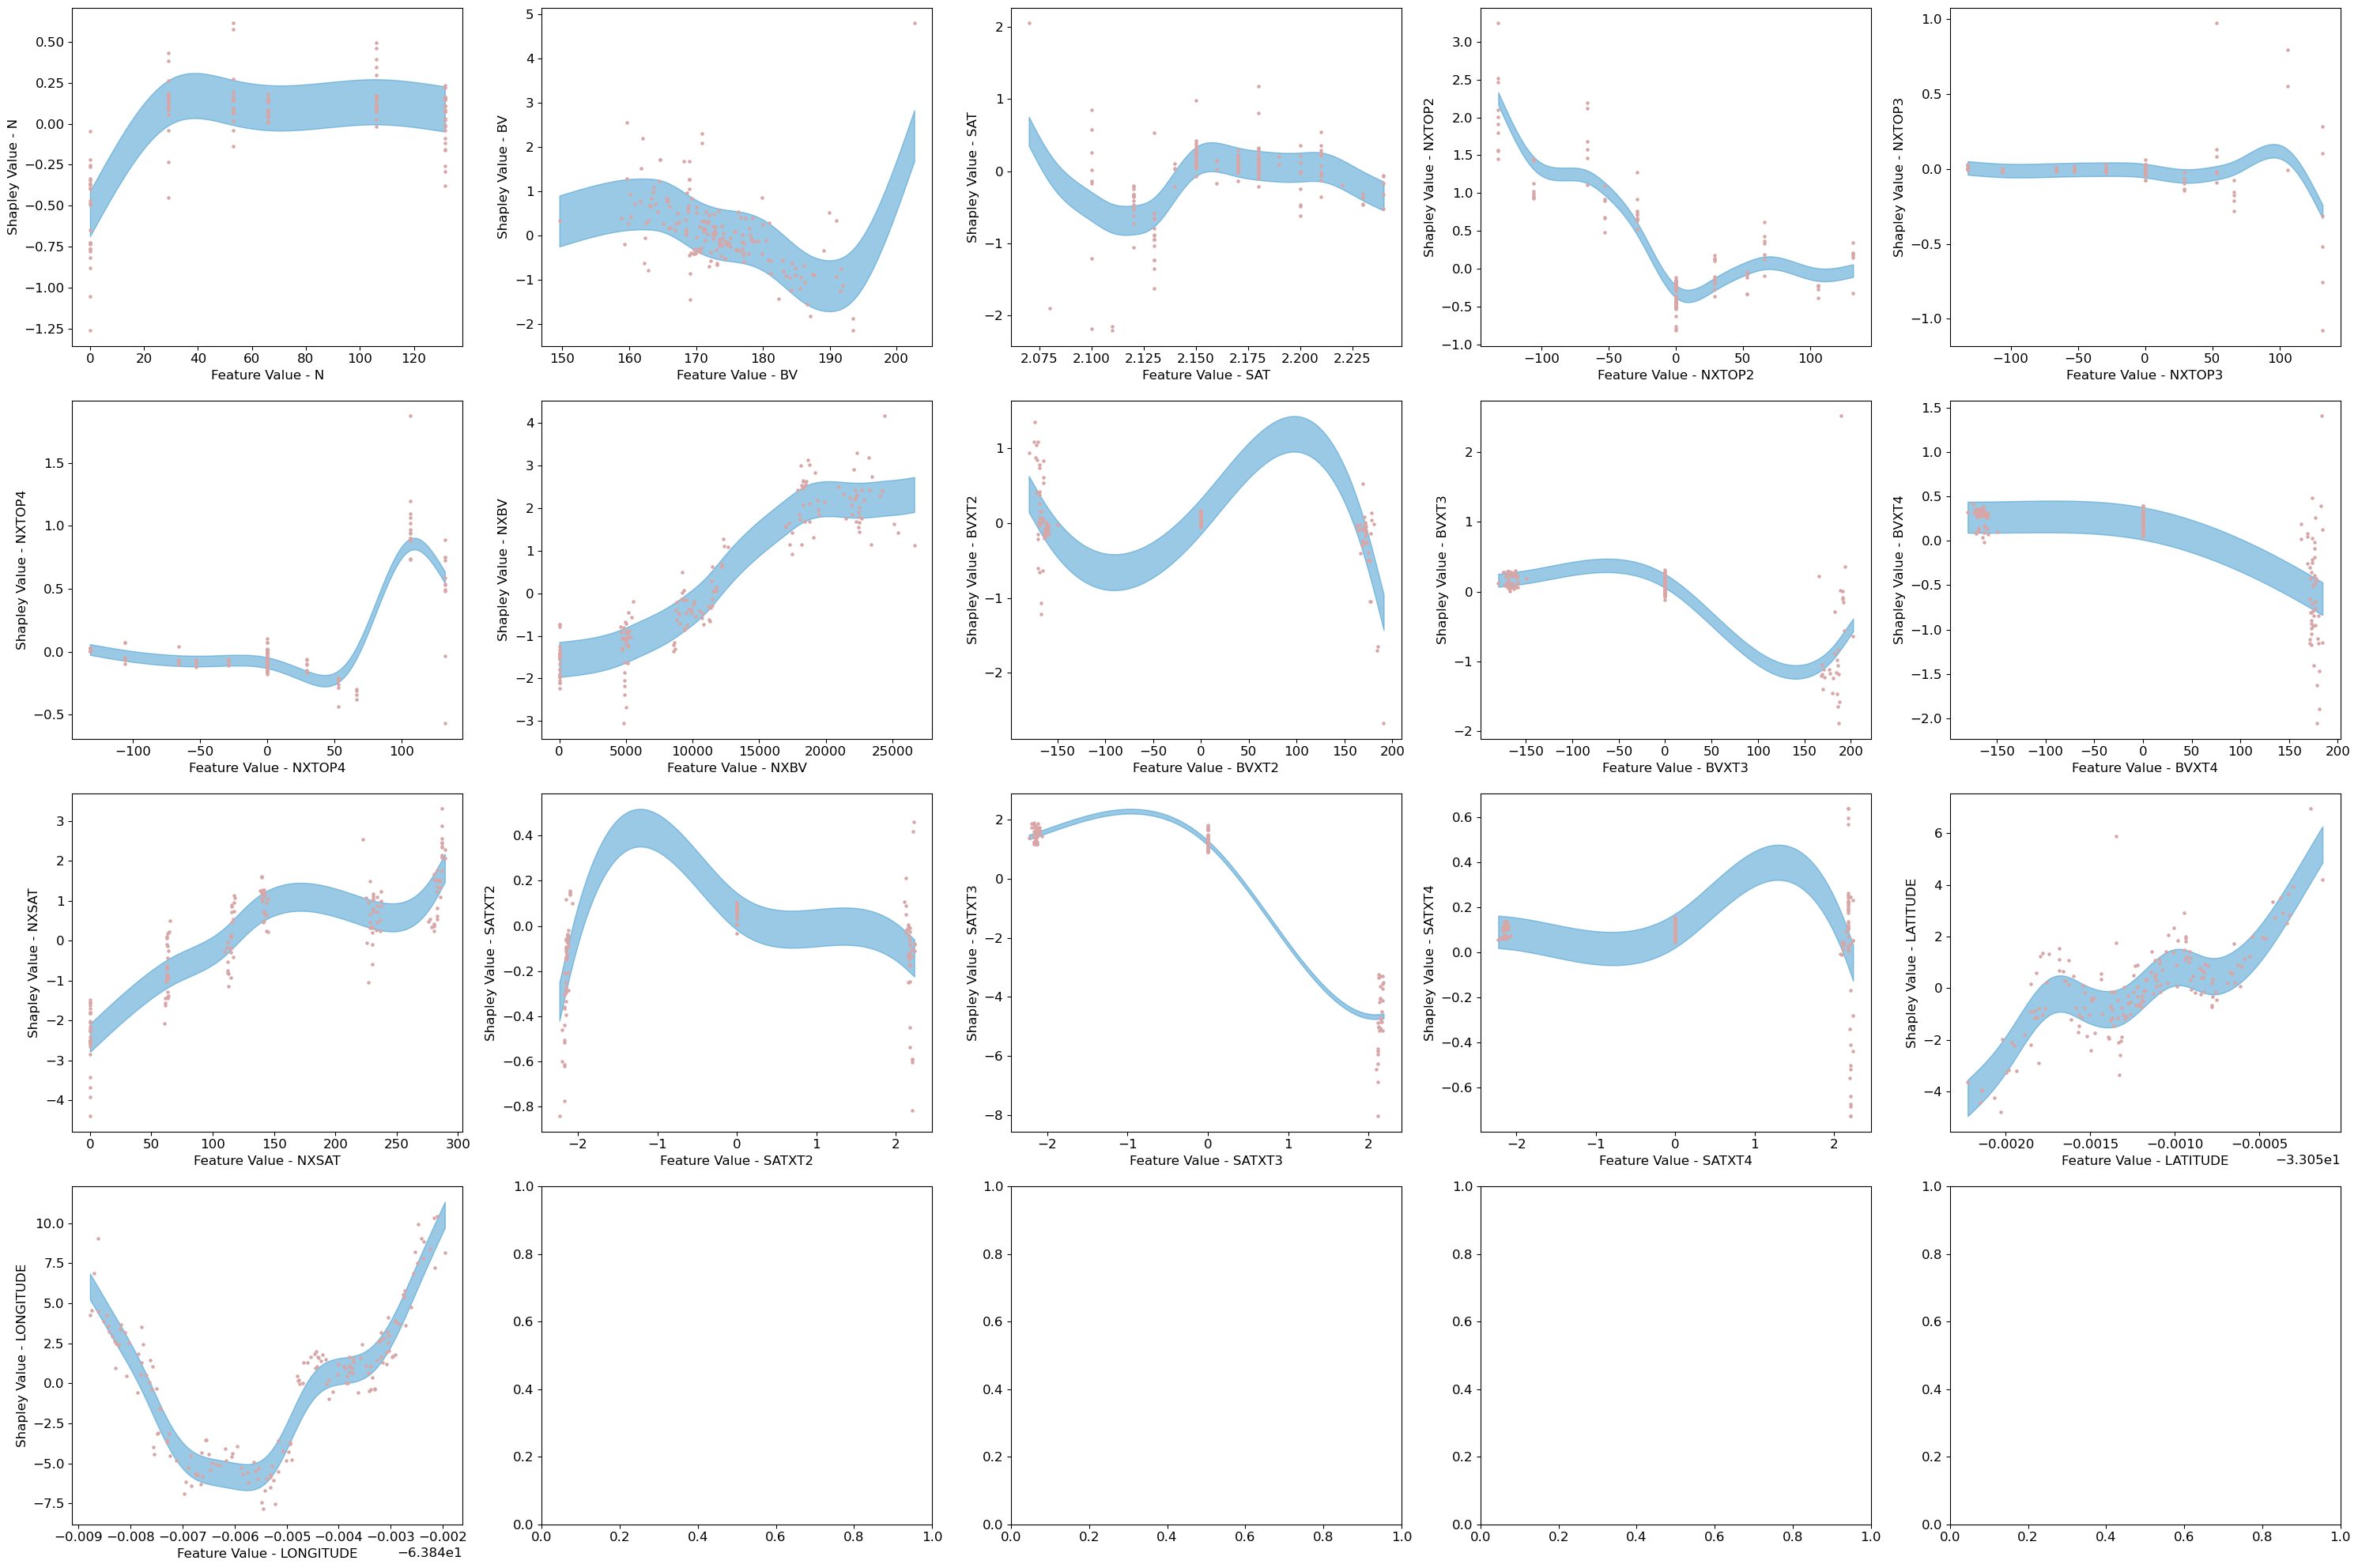

In [23]:
results.plot_partial_dependence_with_fitted_bounds()

In [24]:
## Crop Yield 2001

In [25]:
X_train_01, X_temp, y_train_01, y_temp, loc_train_01, loc_temp = train_test_split(features_2001, crop_yield_2001, loc_2001, train_size=0.8, random_state=42)

In [26]:
X_calib_01, X_test_01, y_calib_01, y_test_01, loc_calib_01, loc_test_01 = train_test_split(X_temp, y_temp, loc_temp, train_size=0.5, random_state=42)

In [27]:
model = xgb.XGBRegressor(n_estimators=500, max_depth=3, min_child_weight=1.0, colsample_bytree=1.0)

In [28]:
model.fit(X_train_01, y_train_01)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
model.score(X_test_01, y_test_01)

0.9496948573325322

In [30]:
explainer = GeoConformalizedExplainer(model, X_train_01, X_calib_01, loc_calib_01.values, loc_test_01.values, 0.1, 0.01)

In [31]:
results = explainer.uncertainty_aware_explain(x_test=X_test_01)

  0%|          | 0/11 [00:00<?, ?it/s]/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:36:05] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:36:05] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)
100%|██████████| 11/11 [00:43<00:00,  3.91s/it]
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:36:06] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "params" } are 

In [32]:
results.accuracy_summary()

,coverage_probability,R2,RMSE,SHAP_Var,Pred_SHAP_Var
N,0.865497,0.959408,0.218280,1.173778,1.121965
BV,0.906433,0.738501,0.435899,0.726609,0.625754
NXTOP2,0.883041,0.973403,0.080986,0.246595,0.258890
NXTOP3,0.871345,0.918726,0.147255,0.266800,0.268102
NXTOP4,0.935673,0.970159,0.042081,0.059342,0.055806
NXBV,0.923977,0.791251,0.772202,2.856515,2.215594
BVXT2,0.918129,0.918903,0.287370,1.018304,0.957890
BVXT3,0.959064,0.995445,0.168746,6.250984,6.037836
BVXT4,0.935673,0.935763,0.170147,0.450679,0.428534
LATITUDE,0.894737,0.828965,0.869455,4.419868,3.529311


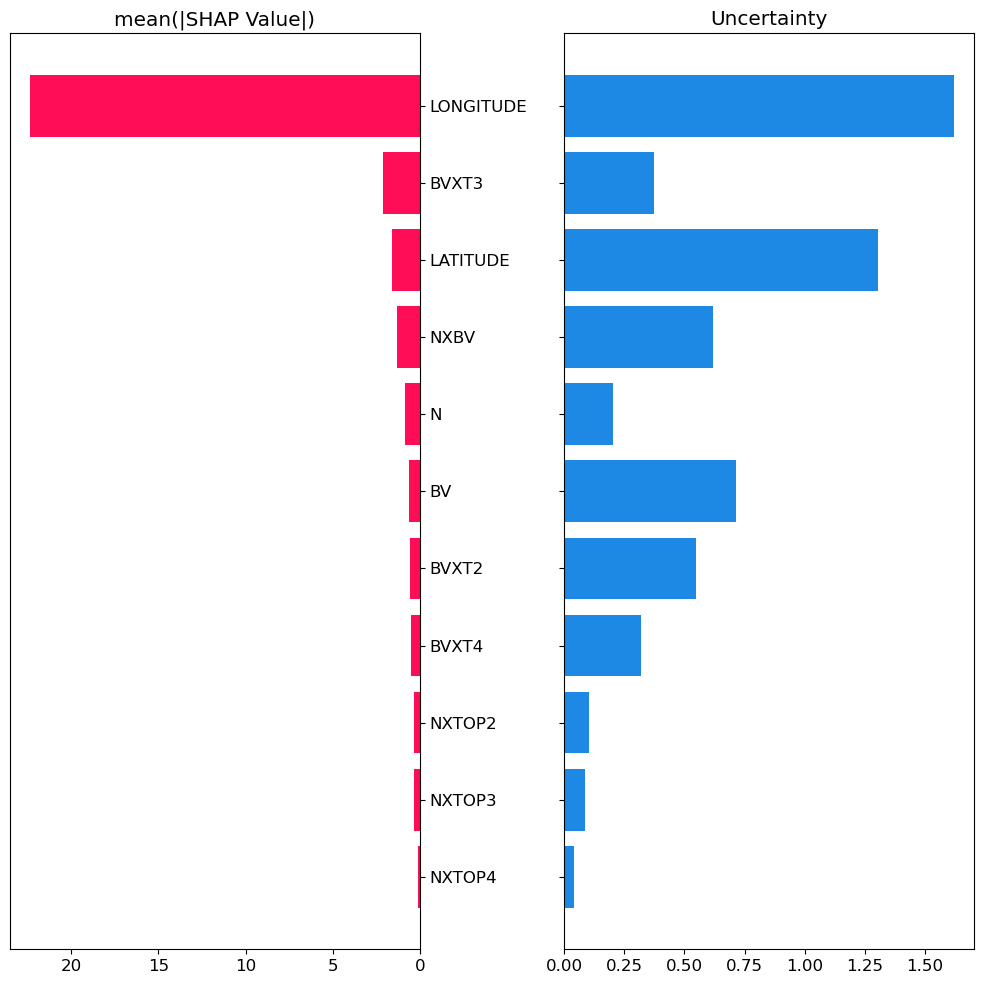

In [33]:
results.plot_absolute_shap_value_with_uncertainty()

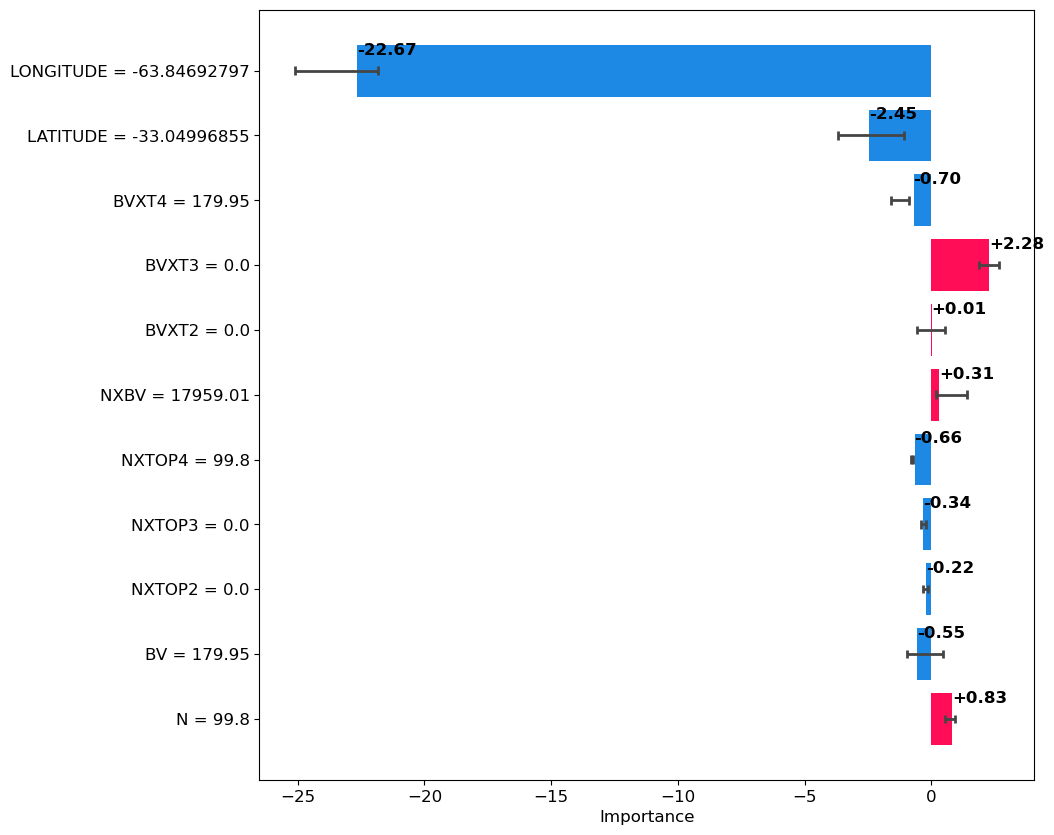

In [34]:
results.plot_shap_values_with_uncertainty(10)

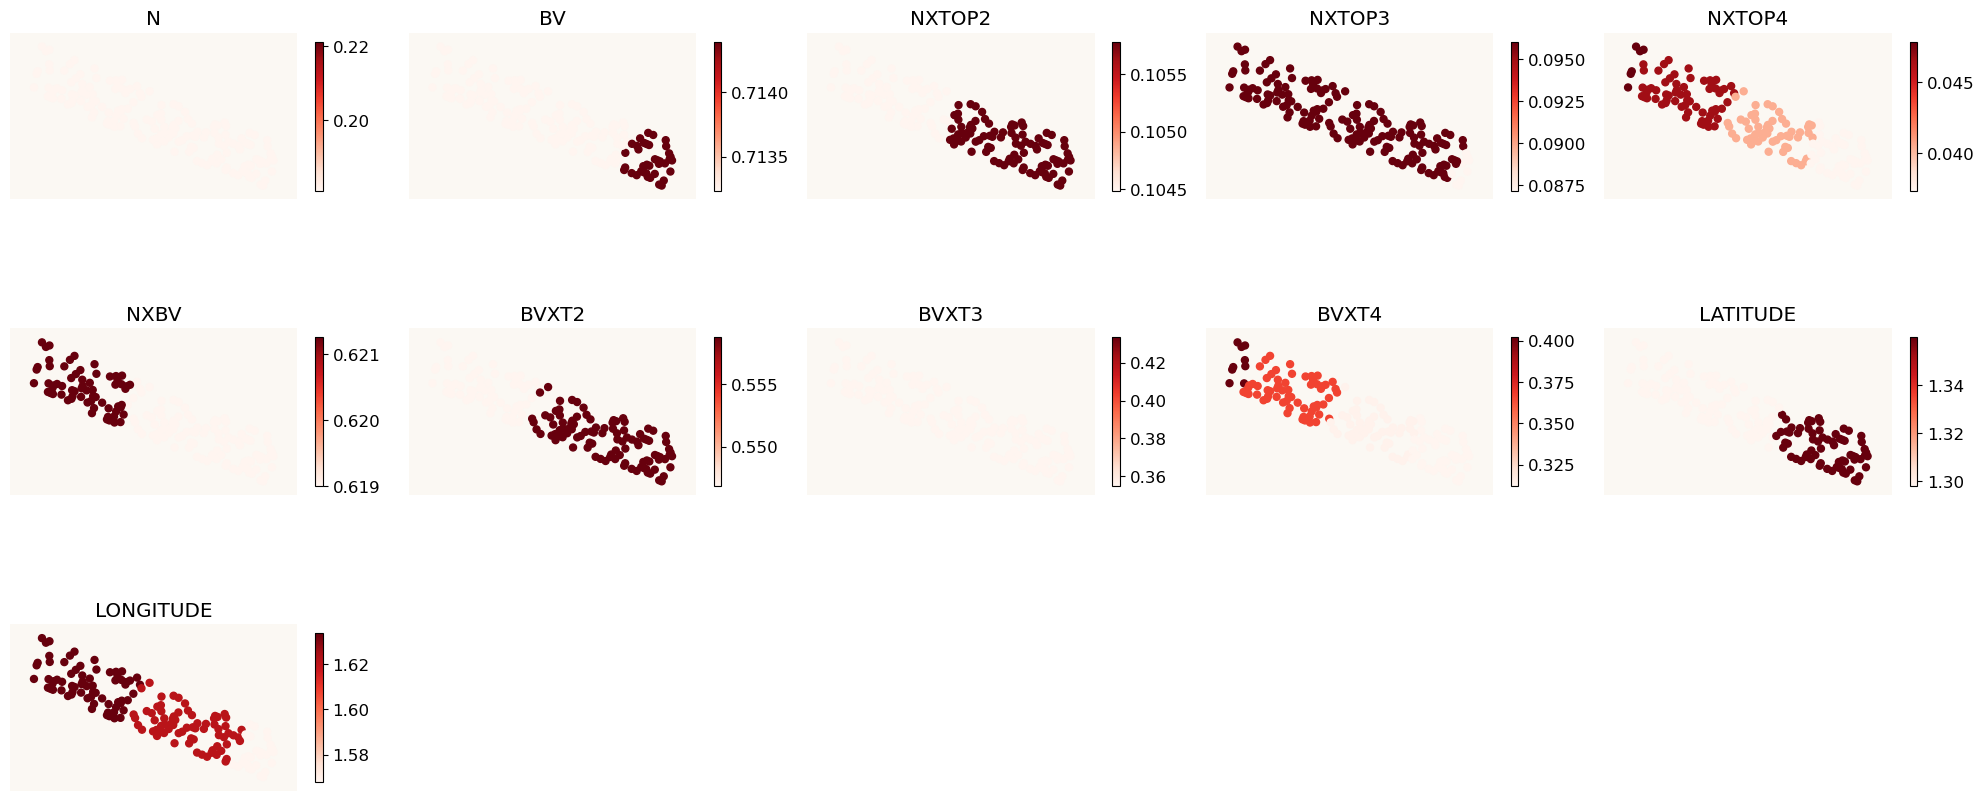

In [38]:
results.plot_geo_uncertainty(figsize=(20, 10), shrink=0.4)

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00

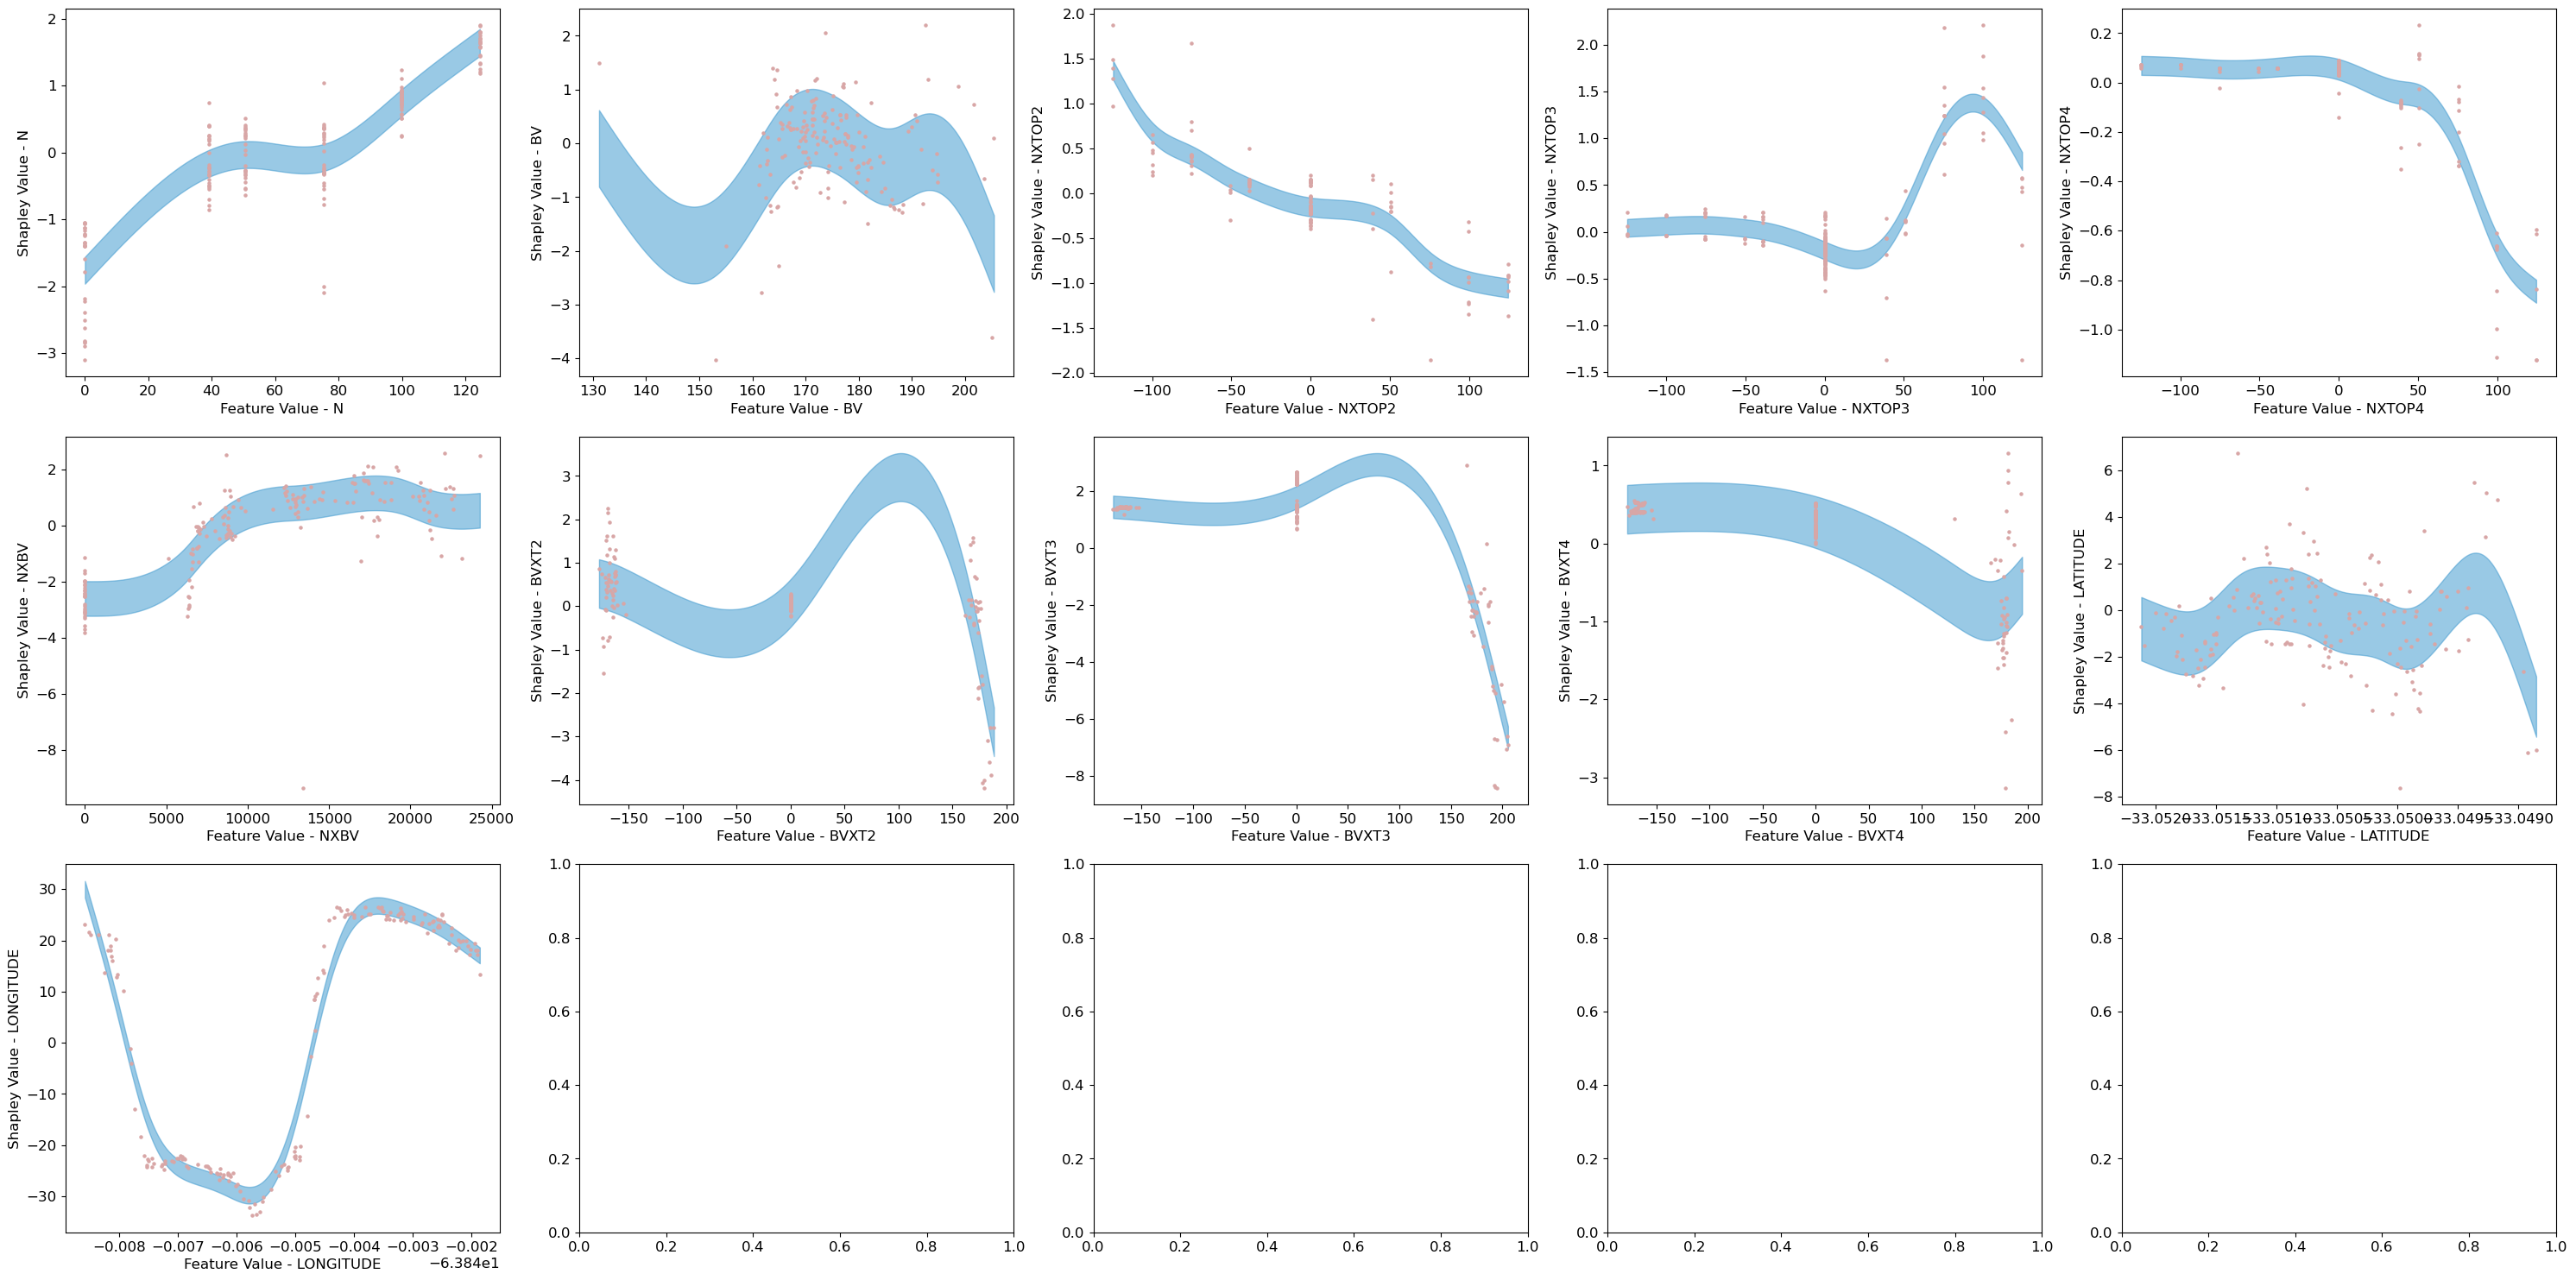

In [36]:
results.plot_partial_dependence_with_fitted_bounds()